# Choropleth Map of Colorado 

## A Prototype

>James Reed  
>November 16, 2020  

https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [151]:
import os
os.getcwd()
from os import listdir
import pandas as pd
from os.path import isfile, join
import glob
import plotly.graph_objects as go
import geopandas as gpd

import matplotlib.pyplot as plt


def gen_colo_redblue(dfi, df_description, var , title, palette = 'RdBu'):
    '''
    gen_colo_choropleth:  Uses baseline geometry of Colorado county map combined with data frame containing county 
            data values and generates a choropleth figure that should plot directly into the Jupyter notebook.  
            Additionally, the figure is saved as a png file in the img directory.
            
    colorscale – Sets the colorscale. The colorscale must be an array containing arrays mapping a normalized value to an 
    rgb, rgba, hex, hsl, hsv, or named color string. At minimum, a mapping for the lowest (0) and highest (1) values are 
    required. For example, [[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)']]. To control the bounds of the colorscale in color space, use`zmin` and zmax. 
    
    Alternatively, colorscale may be a palette name string of the following list: 
    Greys,YlGnBu,Greens,YlOrR d,Bluered,RdBu,Reds,Blues,Picnic,Rainbow,Portland,Jet,H ot,Blackbody,Earth,Electric,Viridis,Cividis.

    
    '''
    # This is the baseline map for all of our choropleth maps - Colorado counties.
    fp =  '../data/shape/Colorado_County_Boundaries.shp'

    map_df = gpd.read_file(fp)
   
    # change the data types of the key index fields to integer so that it matches our census data index
    map_df = map_df.astype({"CNTY_FIPS": int, "US_FIPS": int})

    # Load the data dataframe 
    data_df = dfi.copy(deep = True)

    # Fix up Data 
    data_df = data_df.rename(columns={"state_id": "STATEFP", "county_id": "CNTY_FIPS"})
    print(data_df.loc[data_df['Majority'] == 'Democrat',:])
    # join the geodataframe with the cleaned up census dataframe
    merged = map_df.set_index(['CNTY_FIPS']).join(data_df.set_index(['CNTY_FIPS']))

    # set a variable that will call whatever column we want to visualise on the map
    variable = 'winner'  # Majority?

    # set the range for the choropleth
    vmin = 0.0
    vmax = 1.0
    print(f'vmin: {vmin} vmax: {vmax}')

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))

    # create map
    merged.plot(column=variable, cmap=palette, linewidth=0.8, ax=ax, edgecolor='0.8')

    # remove the axis
    ax.axis('off')

    # add a title
    ax.set_title(title, fontdict={'fontsize': '14', 'fontweight' : '3'})

    # data source annotation
    ax.annotate(f'Source: Census.gov & CDPHE Open Data, (color palette: {palette})',xy=(0.1, .08),  xycoords='figure fraction', 
                horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap= palette, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

    fn = "../img/" + df_description + '_' + var + '_' + palette + '.png'
    #fig.savefig(fn, dpi=600)
    #plt.close()
    plt.show()
    return(merged)


        County  Republican  Democrat  Progressive  Soc_Labor     Reppct  \
11    Costilla      1070.0    1369.0          0.0        3.0  43.870439   
27    Huerfano      2178.0    2773.0          2.0        0.0  43.991113   
32        Lake      1303.0    1585.0          3.0        3.0  45.117729   
35  Las Animas      4467.0    6446.0         12.0        0.0  40.932832   
50      Pueblo     20333.0   20613.0        574.0       46.0  49.658086   

       Dempct  Majority CNTY_FIPS  winner  
11  56.129561  Democrat       023       0  
27  56.008887  Democrat       055       0  
32  54.882271  Democrat       065       0  
35  59.067168  Democrat       071       0  
50  50.341914  Democrat       101       0  
vmin: 0.0 vmax: 1.0


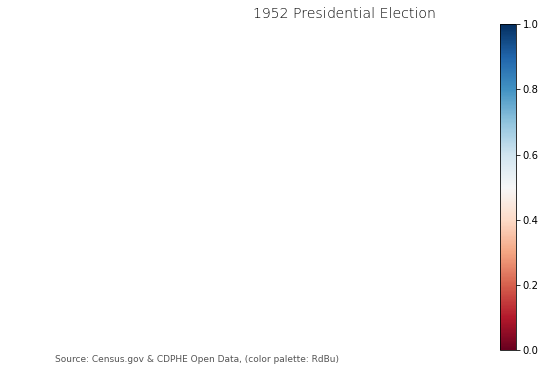

In [153]:
data_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/abstracts/co_1952_majority.p")

data_df['winner'] = 0
data_df.loc[data_df['Majority']  == 'Republican', 'winner'] = 1.0
data_df.loc[data_df['winner'] == 0.0]
m = gen_colo_redblue(data_df, 'decennial_2010', 'winner' ,'1952 Presidential Election')

#gen_colo_choropleth(data_df, 'Colorado', 'urban', 'Colorado Urban Populations')

In [150]:
data_df.columns
fp =  '../data/shape/Colorado_County_Boundaries.shp'

map_df = gpd.read_file(fp)
merged = map_df.set_index(['CNTY_FIPS']).join(data_df.set_index(['CNTY_FIPS']))
merged

,OBJECTID,COUNTY,FULL,LABEL,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS,geometry,County,Republican,Democrat,Progressive,Soc_Labor,Reppct,Dempct,Majority,winner
CNTY_FIPS,,,,,,,,,,,,,,,,,,
069,1,LARIMER,Larimer County,Larimer,69,40.666413,-105.461155,08069,"POLYGON ((-105.05672 40.34928, -105.05670 40.3...",Larimer,14484.0,5266.0,12.0,15.0,73.336709,26.663291,Republican,1.0
071,2,LAS ANIMAS,Las Animas County,Las Animas,71,37.315851,-104.038716,08071,"POLYGON ((-104.14318 37.75833, -104.12615 37.7...",Las Animas,4467.0,6446.0,12.0,0.0,40.932832,59.067168,Democrat,0.0
043,3,FREMONT,Fremont County,Fremont,43,38.472972,-105.439657,08043,"POLYGON ((-105.36889 38.25940, -105.36909 38.2...",Fremont,5964.0,3176.0,8.0,6.0,65.251641,34.748359,Republican,1.0
051,4,GUNNISON,Gunnison County,Gunnison,51,38.666798,-107.031700,08051,"POLYGON ((-106.79969 38.97965, -106.80009 38.9...",Gunnison,1533.0,1045.0,0.0,0.0,59.464701,40.535299,Republican,1.0
021,5,CONEJOS,Conejos County,Conejos,21,37.200696,-106.191629,08021,"POLYGON ((-106.14887 37.40110, -106.14753 37.4...",Conejos,2194.0,1610.0,28.0,26.0,57.676130,42.323870,Republican,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
031,60,DENVER,Denver County,Denver,31,39.762028,-104.876365,08031,"MULTIPOLYGON (((-104.93413 39.70015, -104.9341...",Denver,119792.0,92237.0,725.0,107.0,56.497932,43.502068,Republican,1.0
093,61,PARK,Park County,Park,93,39.119303,-105.717175,08093,"POLYGON ((-105.97508 38.91009, -105.97529 38.9...",Park,775.0,343.0,2.0,0.0,69.320215,30.679785,Republican,1.0
041,62,EL PASO,El Paso County,El Paso,41,38.832093,-104.525583,08041,"POLYGON ((-104.86402 39.12979, -104.86381 39.1...",El Paso,25272.0,11203.0,29.0,12.0,69.285812,30.714188,Republican,1.0


In [148]:
mids = [c for c in map_df['CNTY_FIPS']]
data_df.dtypes

County          object
Republican     float64
Democrat       float64
Progressive    float64
Soc_Labor      float64
Reppct         float64
Dempct         float64
Majority        object
CNTY_FIPS       object
winner           int64
dtype: object

In [137]:
# join the geodataframe with the cleaned up census dataframe
merged = map_df.set_index(['CNTY_FIPS']).join(data_df.set_index(['CNTY_FIPS']))
merged.columns

Index(['OBJECTID', 'COUNTY', 'FULL', 'LABEL', 'NUM_FIPS', 'CENT_LAT',
       'CENT_LONG', 'US_FIPS', 'geometry', 'County', 'Republican', 'Democrat',
       'Progressive', 'Soc_Labor', 'Reppct', 'Dempct', 'Majority'],
      dtype='object')

In [109]:
# Load the data dataframe 
data_df = cf.load_pickled_df(path =
    "/home/jdreed/MSDS696/data/processed/abstracts/co_1952_majority.p")
# Add Geo Fields
data_df[''] = '08'
